# Model Development

# XGB

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [3]:
#input of train data
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Train.csv")

In [33]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d,Target
0,1.693028,1.260847,10.053652,0.904036,6.026203,-1.137217,-837.853718,0.149903,-625.520865,-3.150915,...,0.119106,0.834557,156.775477,7.704475,0.140815,-12.544560,-3.699413,97.098855,-1.078044,1
1,-0.160000,-16.959768,5.316789,0.855497,9.042863,-3.350736,154.068480,0.129078,-954.533845,-2.811453,...,0.177572,0.720924,156.266297,7.448889,0.203932,-7.079175,-7.764219,34.617778,4.560000,1
2,-3.520661,14.955763,11.467335,0.655746,0.000000,-0.711308,-570.997585,0.127517,-208.212718,-0.074724,...,0.130178,0.371037,179.497191,15.363636,0.763846,-22.972316,0.000000,216.000000,1.785124,1
3,-3.000000,-8.378997,5.316789,0.827198,-0.641181,-1.276164,120.990147,0.175345,-716.948087,-2.008475,...,0.281046,0.618603,161.479576,8.096939,0.329182,-31.375253,-2.145085,69.244898,6.000000,1
4,-3.947831,54.171370,5.316789,0.786149,8.465976,-3.188141,-2552.696930,0.147952,-712.434840,-0.404882,...,-0.067660,1.017049,168.668013,7.754132,0.664913,-87.783953,-4.341668,-9.291322,0.089360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-8.214158,0.922341,0.000000,0.959130,21.600003,-2.099758,-86.361631,0.034490,-376.777573,-4.670166,...,-0.045444,1.057126,150.945902,6.395003,0.099263,10.019733,-10.697498,-95.060083,-8.015467,0
476,-6.294925,4.179811,0.000000,0.986466,27.876571,-2.530523,-383.555384,0.056951,-456.530390,-5.347444,...,-0.049150,1.028872,154.187765,6.666667,-0.091731,23.001045,-20.177253,-44.777778,-1.182442,0
477,-24.951848,70.058608,18.823487,0.768811,10.922453,4.908046,-565.670145,0.215391,-272.171019,-8.418947,...,0.041996,0.766511,156.369113,12.292740,0.020256,-70.848983,-23.329686,-1006.311044,-42.679189,0
478,-16.111111,-14.371710,0.000000,0.833433,17.876888,-3.651264,-363.135198,0.034875,-717.608423,-5.059764,...,0.014342,0.963092,149.643793,6.395792,0.257719,-5.076872,-8.343076,-82.262327,1.333333,0


In [34]:
y= df.Target
X=df.drop('Target', axis=1)

In [35]:
cat_features=list(range(0,X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [36]:
df.Target.value_counts()

1    400
0     80
Name: Target, dtype: int64

In [37]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [38]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [39]:
y_train.value_counts()

1    400
0     80
Name: Target, dtype: int64

In [29]:
import xgboost as xgb
#Parameters for 1024 ds
xgb = xgb.XGBClassifier()
#xgb = xgb.XGBClassifier(
    #colsample_bylevel= 0.6,
    #colsample_bytree= 0.9,
    #learning_rate= 0.0009,
    #max_delta_step= 1,
    #max_depth= 10,
    #n_estimators= 3000,
    #objective= 'binary:logistic',
    #subsample= 0.1
#)
xgb.fit(x_train.T, y_train.T)
#v_predictions = xgb.predict(X_v_test_data)
acc_train=xgb.score(x_train.T,y_train.T)*100
#v_acc_test = xgb.score(X_v_test_data, Y_v_test_data)*100
print(acc_train)
#print(v_acc_test)

98.75461254612546


C:\Users\DELL\AppData\Local\Temp\ipykernel_28284\908226684.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_28284\908226684.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_28284\908226684.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_28284\908226684.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\DELL\AppData\Local\Temp\ipykernel_28284\908226684.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in 

<Figure size 4200x3000 with 0 Axes>

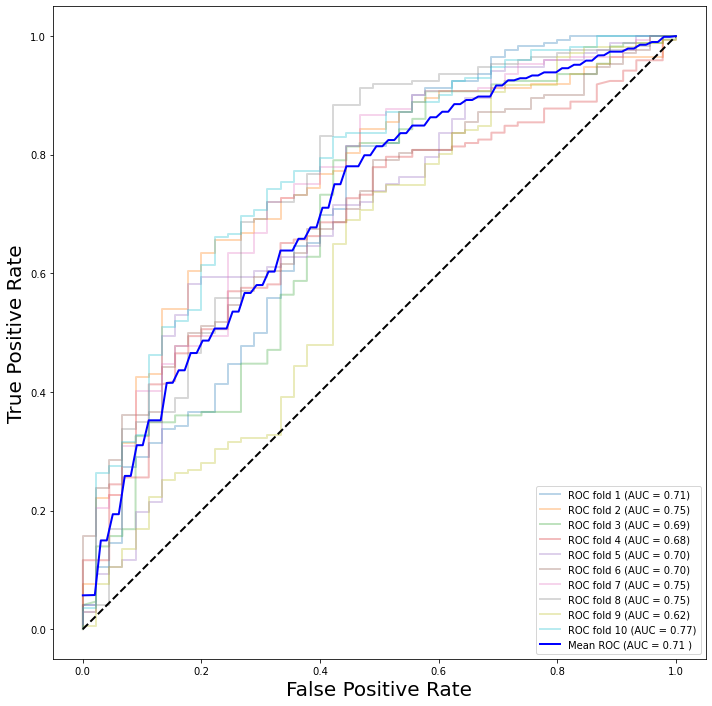

In [32]:
# plot k fold ROC

# 10 fold cross validation of train set
from sklearn.metrics import RocCurveDisplay

from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

plt.figure(figsize=(7, 5), dpi=600)
#x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = xgb.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [33]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

# Assuming x_train and y_train are your training data

# Define the parameters for XGBoost
params = {
    #'colsample_bylevel': 0.9,
    #'colsample_bytree': 0.6,
    #'learning_rate': 0.0009,
    #'max_delta_step': 1,
    #'max_depth': 10,
    #'n_estimators': 4000,
    #'objective': 'binary:logistic',
    #'subsample': 0.8
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(**params)

# Perform k-fold cross-validation
k_folds = 10  # Number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)  # StratifiedKFold for classification
accuracy_scores = []  # To store accuracy scores of each fold

for fold, (train_index, val_index) in enumerate(skf.split(x_train, y_train), 1):
    print(f"Fold {fold}/{k_folds}")
    X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model on this fold
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Calculate accuracy on validation data
    accuracy = xgb_model.score(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)
    print(f"Validation Accuracy: {accuracy}")

# Print average accuracy across all folds
print(f"Average Validation Accuracy: {np.mean(accuracy_scores)}")


Fold 1/10
Validation Accuracy: 0.8341013824884793
Fold 2/10
Validation Accuracy: 0.8202764976958525
Fold 3/10
Validation Accuracy: 0.7972350230414746
Fold 4/10
Validation Accuracy: 0.8202764976958525
Fold 5/10
Validation Accuracy: 0.7926267281105991
Fold 6/10
Validation Accuracy: 0.7880184331797235
Fold 7/10
Validation Accuracy: 0.8110599078341014
Fold 8/10
Validation Accuracy: 0.7741935483870968
Fold 9/10
Validation Accuracy: 0.8055555555555556
Fold 10/10
Validation Accuracy: 0.8101851851851852
Average Validation Accuracy: 0.805352875917392


# Test Set

In [11]:
#Read the validation Test set
v_test_data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(480, 61)

In [12]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)
X_v_test_data

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,VSA_EState3.1,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d
0,1.693028,1.260847,10.053652,0.904036,6.026203,-1.137217,-837.853718,0.149903,-625.520865,-3.150915,...,-0.473182,0.119106,0.834557,156.775477,7.704475,0.140815,-12.544560,-3.699413,97.098855,-1.078044
1,-0.160000,-16.959768,5.316789,0.855497,9.042863,-3.350736,154.068480,0.129078,-954.533845,-2.811453,...,-0.600531,0.177572,0.720924,156.266297,7.448889,0.203932,-7.079175,-7.764219,34.617778,4.560000
2,-3.520661,14.955763,11.467335,0.655746,0.000000,-0.711308,-570.997585,0.127517,-208.212718,-0.074724,...,2.624306,0.130178,0.371037,179.497191,15.363636,0.763846,-22.972316,0.000000,216.000000,1.785124
3,-3.000000,-8.378997,5.316789,0.827198,-0.641181,-1.276164,120.990147,0.175345,-716.948087,-2.008475,...,-0.929653,0.281046,0.618603,161.479576,8.096939,0.329182,-31.375253,-2.145085,69.244898,6.000000
4,-3.947831,54.171370,5.316789,0.786149,8.465976,-3.188141,-2552.696930,0.147952,-712.434840,-0.404882,...,2.829711,-0.067660,1.017049,168.668013,7.754132,0.664913,-87.783953,-4.341668,-9.291322,0.089360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-8.214158,0.922341,0.000000,0.959130,21.600003,-2.099758,-86.361631,0.034490,-376.777573,-4.670166,...,0.000000,-0.045444,1.057126,150.945902,6.395003,0.099263,10.019733,-10.697498,-95.060083,-8.015467
476,-6.294925,4.179811,0.000000,0.986466,27.876571,-2.530523,-383.555384,0.056951,-456.530390,-5.347444,...,2.726381,-0.049150,1.028872,154.187765,6.666667,-0.091731,23.001045,-20.177253,-44.777778,-1.182442
477,-24.951848,70.058608,18.823487,0.768811,10.922453,4.908046,-565.670145,0.215391,-272.171019,-8.418947,...,38.500958,0.041996,0.766511,156.369113,12.292740,0.020256,-70.848983,-23.329686,-1006.311044,-42.679189
478,-16.111111,-14.371710,0.000000,0.833433,17.876888,-3.651264,-363.135198,0.034875,-717.608423,-5.059764,...,0.000000,0.014342,0.963092,149.643793,6.395792,0.257719,-5.076872,-8.343076,-82.262327,1.333333


In [13]:
import xgboost as xgb
#Parameters for 1024 ds
xgb = xgb.XGBClassifier(
#    colsample_bylevel= 0.9,
#    colsample_bytree= 0.6,
#   learning_rate= 0.0009,
#    max_delta_step= 1,
#    max_depth= 10,
#    n_estimators= 4000,
#    objective= 'binary:logistic',
#    subsample= 0.8
)
xgb.fit(x_train.T, y_train.T)
v_predictions = xgb.predict(X_v_test_data)
acc_train=xgb.score(x_train.T,y_train.T)*100
v_acc_test = xgb.score(X_v_test_data, Y_v_test_data)*100
print(acc_train)
print(v_acc_test)

98.75461254612546
85.0


In [43]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:85.000
Sensitivity:0.917
Specificity:0.512
Balance accuracy:0.715
MCC: 0.444
AUC: 0.715
Brier_loss: 0.150
False Postive rate: 0.487
False Negative rate: 0.083
Precision: 0.904
Recall: 0.917
F1: 0.911
Kappa: 0.443


In [44]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        80
           1       0.90      0.92      0.91       400

    accuracy                           0.85       480
   macro avg       0.73      0.71      0.72       480
weighted avg       0.85      0.85      0.85       480



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

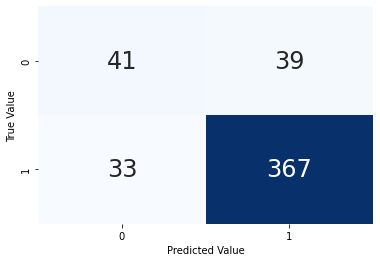

In [45]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [74]:
m2= xgb.predict_proba(X_v_test_data)
m2 = pd.DataFrame(m2)
m2.to_csv("D:\\Orchid_Baruah\\New\\April\\11 April\\Probabs\\XGB_Probabs.csv")

In [46]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]
xgb_prob = xgb.predict_proba(X_v_test_data)
xgb_prob = xgb_prob[:,1]
#xgb_prob

In [47]:
r_auc_score = roc_auc_score(Y_v_test_data, xgb_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, xgb_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.8204999999999999


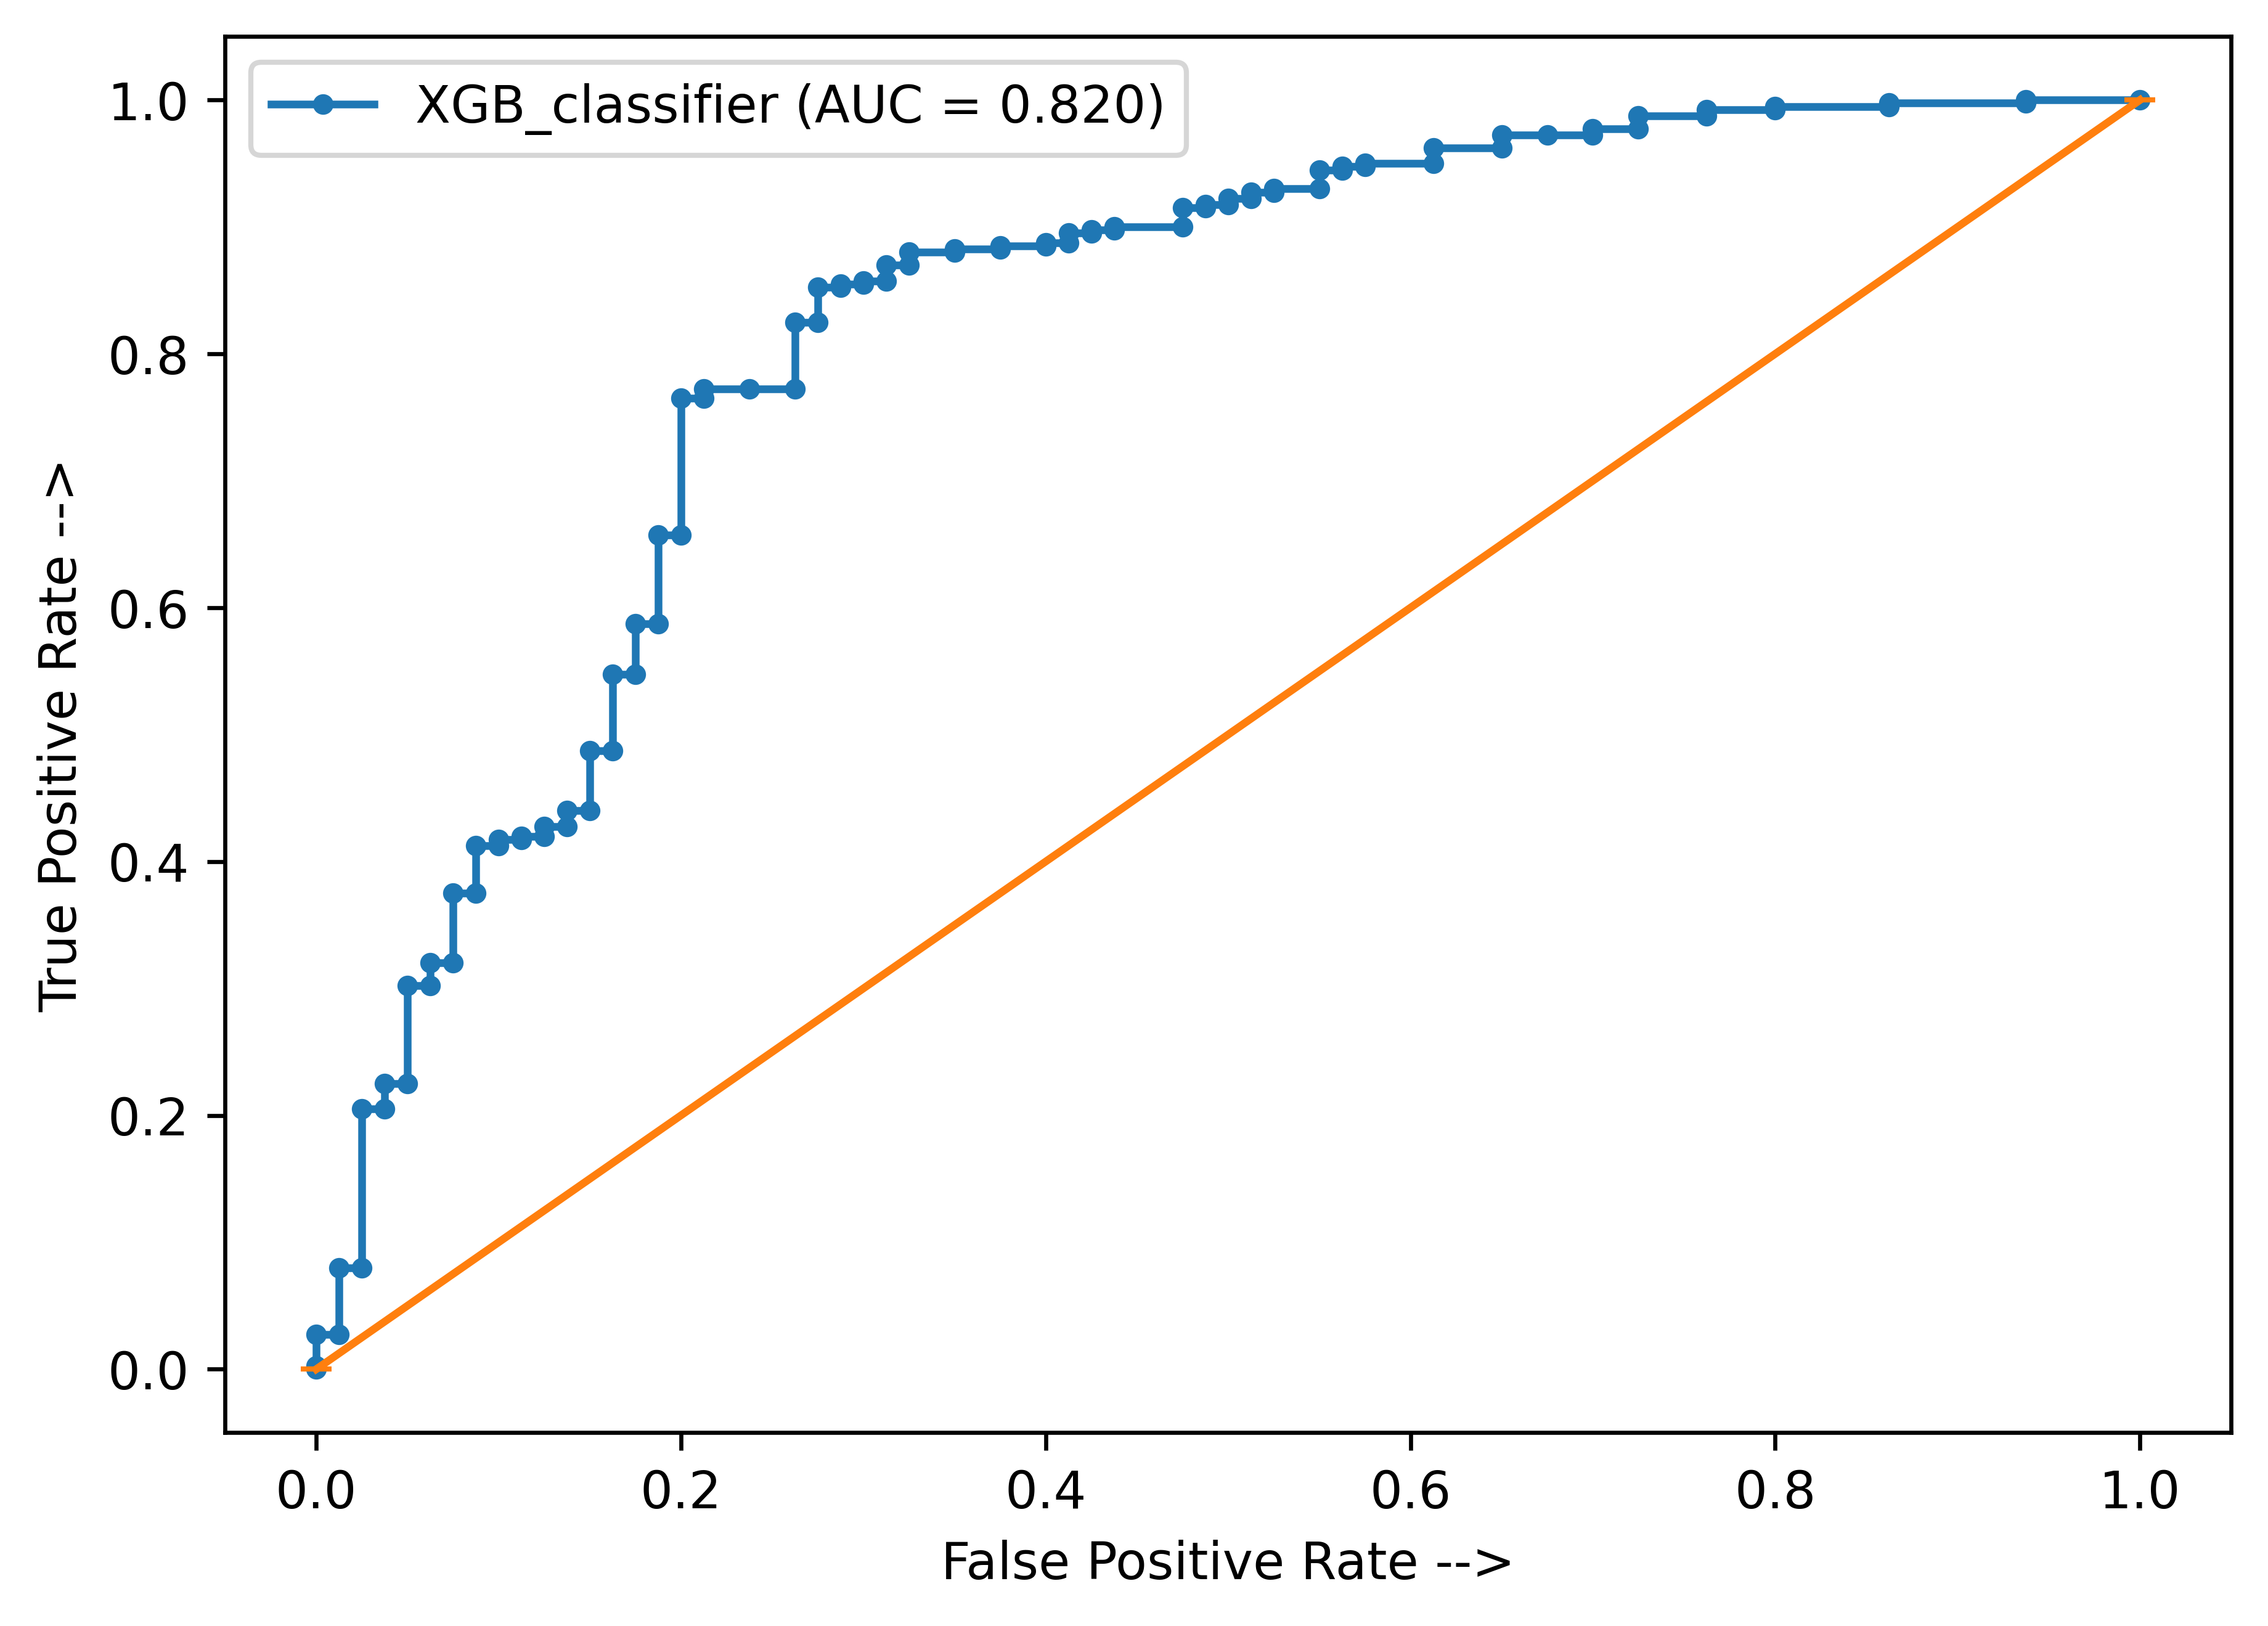

In [49]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='XGB_classifier (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('XGB_AUC.png', dpi=600, bbox_inches='tight') to save the image

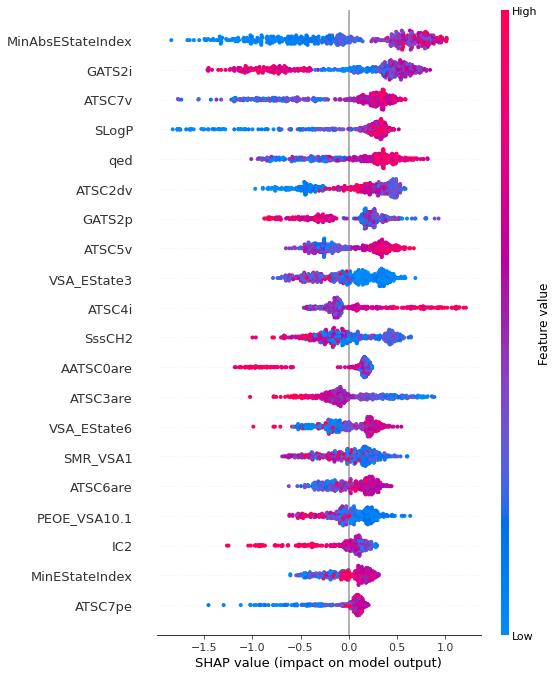

<Figure size 432x288 with 0 Axes>

In [7]:
import shap
import xgboost as xgb

# Assuming v_test_data is your dataset
Y_v_test_data = v_test_data['Target']
X_v_test_data = v_test_data.drop('Target', axis=1)

# Train XGBoost model
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_v_test_data, Y_v_test_data)

# Create a SHAP explainer
explainer = shap.Explainer(xgboost_model, X_v_test_data)

# Calculate SHAP values
shap_values = explainer.shap_values(X_v_test_data)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data)

# Probability prediction

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Load data from Excel file
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test.csv")

# Assuming 'Target' is the column containing the target variable
y = data['Target']  # Target variable

# Split the data into features (excluding 'Target')
X = data.drop('Target', axis=1)

# Split the data into training and testing sets
# Note: Since you don't have features, you'll just split the target variable
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = XGBClassifier()

# Fit the model on the training data (which is just the target variable)
model.fit(y_train.to_frame(), y_train)

# Predict probabilities for the test set
probabilities = model.predict_proba(y_test.to_frame())

# Assuming '1' is the class of interest, you can get the probabilities of '1'
# by accessing the second column of the predicted probabilities
probability_of_target = probabilities[:, 1]

# Convert probabilities to binary values (1 or 0) based on a threshold (e.g., 0.5)
threshold = 0.5
binary_predictions = (probability_of_target >= threshold).astype(int)

# Create a DataFrame to store the binary predictions and predicted probabilities
result_df = pd.DataFrame({'Target': y_test, 'Predicted_Probability': probability_of_target, 'Binary_Predictions': binary_predictions})

# Save the DataFrame to an Excel file
result_df.to_excel("D:\\Orchid_Baruah\\New\\April\\11 April\\Probabs\\XGB_Probabs.xlsx", index=False)


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load data from Excel file
data = pd.read_csv("D:\\Orchid_Baruah\\New\\April\\Final_dataset\\Test_with_smiles.csv")

# Extracting features (SMILES) and target labels
X_smiles = data['SMILES']  # Features (SMILES)
y = data['Target']  # Target labels

# Split the data into training and testing sets
X_train_smiles, X_test_smiles, y_train, y_test = train_test_split(X_smiles, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = XGBClassifier()

# Random Forest requires numerical input, so we will use placeholder features
X_train = X_train_smiles.index.to_numpy().reshape(-1, 1)
y_train = y_train
X_test = X_test_smiles.index.to_numpy().reshape(-1, 1)

# Train the RandomForestClassifier
model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
probabilities = model.predict_proba(data.index.to_numpy().reshape(-1, 1))

# Assuming '1' is the class of interest, you can get the probabilities of '1'
# by accessing the second column of the predicted probabilities
probability_of_target = probabilities[:, 1]

# Convert probabilities to binary values (1 or 0) based on a threshold (e.g., 0.5)
threshold = 0.4
binary_predictions = (probability_of_target >= threshold).astype(int)

# Add the binary predictions to the DataFrame
data['Predicted_Probability'] = binary_predictions

# Save the DataFrame to a new Excel file
data.to_excel("D:\\Orchid_Baruah\\New\\April\\11 April\\Probabs\\XGB_Probabs.xlsx", index=False)


In [66]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

In [68]:
pred

array([[0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00349063, 0.9965094 ],
       [0.00268263, 0.9973174 ],
       [0.00349063, 0.9965094 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00349063, 0.9965094 ],
       [0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.9853052 , 0.0146948 ],
       [0.00349063, 0.9965094 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.00268263, 0.9973174 ],
       [0.